In [ ]:
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf
import random
import shutil
from shutil import copyfile
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop
from efficientnet.tfkeras import EfficientNetB3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#! mkdir ~/.kaggle

In [ ]:
#! cp /content/drive/MyDrive/ML/kaggle.json ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/ML/kaggle.json': No such file or directory


In [ ]:
#! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
#! kaggle datasets download faldoae/padangfood

 84% 96.0M/114M [00:00<00:00, 113MB/s]
100% 114M/114M [00:00<00:00, 137MB/s] 


In [ ]:

! ls /content/drive/MyDrive/Datasets

! unzip "/content/drive/MyDrive/Datasets/dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/gado/gado gado-20733.jpg  
  inflating: dataset/train/gado/gado gado-20734.jpg  
  inflating: dataset/train/gado/gado gado-20735.jpg  
  inflating: dataset/train/gado/gado gado-20736.jpg  
  inflating: dataset/train/gado/gado gado-20737.jpg  
  inflating: dataset/train/gado/gado gado-20738.jpg  
  inflating: dataset/train/gado/gado gado-20739.jpg  
  inflating: dataset/train/gado/gado gado-20740.jpg  
  inflating: dataset/train/gado/gado gado-20741.jpg  
  inflating: dataset/train/gado/gado gado-20742.jpg  
  inflating: dataset/train/gado/gado gado-20743.jpg  
  inflating: dataset/train/gado/gado gado-20744.jpg  
  inflating: dataset/train/gado/gado gado-20745.jpg  
  inflating: dataset/train/gado/gado gado-20746.jpg  
  inflating: dataset/train/gado/gado gado-20747.jpg  
  inflating: dataset/train/gado/gado gado-20748.jpg  
  inflating: dataset/train/gado/gado gado-20749.jpg  
  inflating: dataset/train/gado

In [ ]:
source_path = '/content/drive/MyDrive/Datasets/'

source_path_ayam_goreng = os.path.join(source_path, 'ayam_goreng')
source_path_ayam_pop = os.path.join(source_path, 'ayam_pop')
source_path_daging_rendang = os.path.join(source_path, 'daging_rendang')
source_path_dendeng_batokok = os.path.join(source_path, 'dendeng_batokok')
source_path_gulai_ikan = os.path.join(source_path, 'gulai_ikan')
source_path_gulai_tambusu = os.path.join(source_path, 'gulai_tambusu')
source_path_gulai_tunjang = os.path.join(source_path, 'gulai_tunjang')
source_path_telur_balado = os.path.join(source_path, 'telur_balado')
source_path_telur_dadar = os.path.join(source_path, 'telur_dadar')

print(f"There are {len(os.listdir(source_path_ayam_goreng))} images of Ayam goreng.")
print(f"There are {len(os.listdir(source_path_ayam_pop))} images of Ayam pop.")
print(f"There are {len(os.listdir(source_path_daging_rendang))} images of Rendang.")
print(f"There are {len(os.listdir(source_path_dendeng_batokok))} images of Dendeng batokok.")
print(f"There are {len(os.listdir(source_path_gulai_ikan))} images of Gulai ikan.")
print(f"There are {len(os.listdir(source_path_gulai_tambusu))} images of Gulai tambusu.")
print(f"There are {len(os.listdir(source_path_gulai_tunjang))} images of Gulai tunjang.")
print(f"There are {len(os.listdir(source_path_telur_balado))} images of Telur balado.")
print(f"There are {len(os.listdir(source_path_telur_dadar))} images of Telur dadar.")

In [ ]:
root_dir = '/content/dataset_padang_food'


training = os.path.join(root_dir, "training")
validation = os.path.join(root_dir, "validation")
t_ayamgoreng = os.path.join(root_dir, training, "ayam_goreng")
t_ayampop = os.path.join(root_dir, training, "ayam_pop")
t_rendang = os.path.join(root_dir, training, "rendang")
t_tdadar = os.path.join(root_dir, training, "telur_dadar")
t_tbalado = os.path.join(root_dir, training, "telur_balado")

v_ayamgoreng = os.path.join(root_dir, validation, "ayam_goreng")
v_ayampop = os.path.join(root_dir, validation, "ayam_pop") 
v_rendang = os.path.join(root_dir, validation, "rendang") 
v_tdadar = os.path.join(root_dir, validation, "telur_dadar") 
v_tbalado = os.path.join(root_dir, validation, "telur_balado") 

os.makedirs(training)
os.makedirs(validation)
os.makedirs(t_ayamgoreng)
os.makedirs(t_ayampop)
os.makedirs(t_rendang)
os.makedirs(t_tdadar)
os.makedirs(t_tbalado)

os.makedirs(v_ayamgoreng)
os.makedirs(v_ayampop)
os.makedirs(v_rendang)
os.makedirs(v_tdadar)
os.makedirs(v_tbalado)

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/dataset_padang_food/validation
/content/dataset_padang_food/daging_rendang
/content/dataset_padang_food/training
/content/dataset_padang_food/gulai_tunjang
/content/dataset_padang_food/gulai_tambusu
/content/dataset_padang_food/dendeng_batokok
/content/dataset_padang_food/ayam_pop
/content/dataset_padang_food/gulai_ikan
/content/dataset_padang_food/telur_balado
/content/dataset_padang_food/telur_dadar
/content/dataset_padang_food/ayam_goreng
/content/dataset_padang_food/validation/ayam_pop
/content/dataset_padang_food/validation/telur_balado
/content/dataset_padang_food/validation/rendang
/content/dataset_padang_food/validation/telur_dadar
/content/dataset_padang_food/validation/ayam_goreng
/content/dataset_padang_food/training/ayam_pop
/content/dataset_padang_food/training/telur_balado
/content/dataset_padang_food/training/rendang
/content/dataset_padang_food/training/telur_dadar
/content/dataset_padang_food/training/ayam_goreng


In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """
  files = []
  for file_name in os.listdir(SOURCE_DIR):
    file_path = SOURCE_DIR + file_name

    if os.path.getsize(file_path):
      files.append(file_name)
    else:
      print('{} is zero length, so ignoring.'.format(file_name))

  split = int(len(files) * SPLIT_SIZE)  

  sample = random.sample(files, len(files))
  training_set = sample[:split]
  validation_set = sample[split:]

  for file_name in training_set:
    copyfile(SOURCE_DIR + file_name, TRAINING_DIR + file_name)
    
  for file_name in validation_set:
    copyfile(SOURCE_DIR + file_name, VALIDATION_DIR + file_name)
    


In [ ]:
AYGORENG_SOURCE_DIR = "/content/dataset_padang_food/ayam_goreng/"
AYPOP_SOURCE_DIR = "/content/dataset_padang_food/ayam_pop/"
RENDANG_SOURCE_DIR = "/content/dataset_padang_food/daging_rendang/"
TBALADO_SOURCE_DIR = "/content/dataset_padang_food/telur_balado/"
TDADAR_SOURCE_DIR = "/content/dataset_padang_food/telur_dadar/"


TRAINING_DIR = "/content/dataset_padang_food/training"
VALIDATION_DIR = "/content/dataset_padang_food/validation"

TRAINING_AYGORENG_DIR = os.path.join(TRAINING_DIR, "ayam_goreng/")
VALIDATION_AYGORENG_DIR = os.path.join(VALIDATION_DIR, "ayam_goreng/")

TRAINING_AYPOP_DIR = os.path.join(TRAINING_DIR, "ayam_pop/")
VALIDATION_AYPOP_DIR = os.path.join(VALIDATION_DIR, "ayam_pop/")

TRAINING_RENDANG_DIR = os.path.join(TRAINING_DIR, "rendang/")
VALIDATION_RENDANG_DIR = os.path.join(VALIDATION_DIR, "rendang/")

TRAINING_TBALADO_DIR = os.path.join(TRAINING_DIR, "telur_balado/")
VALIDATION_TBALADO_DIR = os.path.join(VALIDATION_DIR, "telur_balado/")

TRAINING_TDADAR_DIR = os.path.join(TRAINING_DIR, "telur_dadar/")
VALIDATION_TDADAR_DIR = os.path.join(VALIDATION_DIR, "telur_dadar/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_AYGORENG_DIR)) > 0:
  for file in os.scandir(TRAINING_AYGORENG_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_AYPOP_DIR)) > 0:
  for file in os.scandir(TRAINING_AYPOP_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_RENDANG_DIR)) > 0:
  for file in os.scandir(TRAINING_RENDANG_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_TBALADO_DIR)) > 0:
  for file in os.scandir(TRAINING_TBALADO_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_TDADAR_DIR)) > 0:
  for file in os.scandir(TRAINING_TDADAR_DIR):
    os.remove(file.path)   

if len(os.listdir(VALIDATION_AYGORENG_DIR)) > 0:
  for file in os.scandir(VALIDATION_AYGORENG_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_AYPOP_DIR)) > 0:
  for file in os.scandir(VALIDATION_AYPOP_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_RENDANG_DIR)) > 0:
  for file in os.scandir(VALIDATION_RENDANG_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_TBALADO_DIR)) > 0:
  for file in os.scandir(VALIDATION_TBALADO_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_TDADAR_DIR)) > 0:
  for file in os.scandir(VALIDATION_TDADAR_DIR):
    os.remove(file.path) 

split_size = .8
split_data(AYGORENG_SOURCE_DIR, TRAINING_AYGORENG_DIR, VALIDATION_AYGORENG_DIR, split_size)
split_data(AYPOP_SOURCE_DIR, TRAINING_AYPOP_DIR, VALIDATION_AYPOP_DIR, split_size)
split_data(RENDANG_SOURCE_DIR, TRAINING_RENDANG_DIR, VALIDATION_RENDANG_DIR, split_size)
split_data(TBALADO_SOURCE_DIR, TRAINING_TBALADO_DIR, VALIDATION_TBALADO_DIR, split_size)
split_data(TDADAR_SOURCE_DIR, TRAINING_TDADAR_DIR, VALIDATION_TDADAR_DIR, split_size)


In [ ]:
print(f"There are {len(os.listdir(TRAINING_AYGORENG_DIR))} images of Ayam goreng for training")
print(f"There are {len(os.listdir(TRAINING_AYPOP_DIR))} images of Ayam pop for training")
print(f"There are {len(os.listdir(TRAINING_RENDANG_DIR))} images of Rendang for training")
print(f"There are {len(os.listdir(TRAINING_TBALADO_DIR))} images of Telur balado for training")
print(f"There are {len(os.listdir(TRAINING_TDADAR_DIR))} images of Telur dadar for training \n")

print(f"There are {len(os.listdir(VALIDATION_AYGORENG_DIR))} images of Ayam goreng for validation")
print(f"There are {len(os.listdir(VALIDATION_AYPOP_DIR))} images of Ayam pop for validation")
print(f"There are {len(os.listdir(VALIDATION_RENDANG_DIR))} images of Rendang for validation")
print(f"There are {len(os.listdir(VALIDATION_TBALADO_DIR))} images of Telur balado for validation")
print(f"There are {len(os.listdir(VALIDATION_TDADAR_DIR))} images of Telur dadar for validation")

There are 85 images of Ayam goreng for training
There are 90 images of Ayam pop for training
There are 83 images of Rendang for training
There are 88 images of Telur balado for training
There are 92 images of Telur dadar for training 

There are 22 images of Ayam goreng for validation
There are 23 images of Ayam pop for validation
There are 21 images of Rendang for validation
There are 23 images of Telur balado for validation
There are 24 images of Telur dadar for validation


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True)
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=128,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))
  
  validation_datagen    = ImageDataGenerator(rescale = 1.0/255.0)
  validation_generator  = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150,150))

  return train_generator, validation_generator, 

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 438 images belonging to 5 classes.
Found 113 images belonging to 5 classes.


In [ ]:
def create_pretrained_model():
  pretrained_model = EfficientNetB3(include_top=False,
                                   weights="imagenet",
                                   input_shape=(150,150,3))
  for layer in pretrained_model.layers:
    layer.trainable = False
  return pretrained_model

In [ ]:
pretrained_model = create_pretrained_model()

44107200/44107200 [==============================] - 1s 0us/step


In [ ]:
def output_of_last_layer(pretrained_model):
  last_desired_layer = pretrained_model.get_layer('top_activation') #avg_pool diganti top_activation biar bisa ditambah layer CNN sama MaxPool
  print('Last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('Last layer output: ', last_output)
  return last_output

In [ ]:
last_output = output_of_last_layer(pretrained_model)

Last layer output shape:  (None, 5, 5, 1536)
Last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 1536), dtype=tf.float32, name=None), name='top_activation/mul:0', description="created by layer 'top_activation'")


In [ ]:
def create_model(pretrained_model, last_output):
  x = layers.Conv2D(256, (2,2), activation = 'relu')(last_output)
  x = layers.Conv2D(128, (2,2), activation = 'relu')(x)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Flatten()(x)
  x = layers.Dense(128, activation = 'relu')(x)
  x = layers.Dropout(0.6)(x)
  x = layers.Dense(64, activation = 'relu')(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(5, activation = 'softmax')(x)

  model = Model(inputs=pretrained_model.input, outputs=x)

  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
  return model

In [ ]:

model = create_model(pretrained_model, last_output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 75, 75, 40)   1080        ['input_1[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 75, 75, 40)   160         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (Activation)   (None, 75, 75, 40)   0           ['stem_bn[0][0]']          

In [ ]:

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)
     

Epoch 1/15
4/4 [==============================] - 63s 13s/step - loss: 1.6499 - accuracy: 0.2466 - val_loss: 1.2884 - val_accuracy: 0.5310
Epoch 2/15
4/4 [==============================] - 47s 11s/step - loss: 1.3063 - accuracy: 0.4566 - val_loss: 0.7821 - val_accuracy: 0.8850
Epoch 3/15
4/4 [==============================] - 49s 12s/step - loss: 1.1510 - accuracy: 0.5297 - val_loss: 0.5919 - val_accuracy: 0.9027
Epoch 4/15
4/4 [==============================] - 57s 12s/step - loss: 1.0272 - accuracy: 0.6005 - val_loss: 0.7041 - val_accuracy: 0.7522
Epoch 5/15
4/4 [==============================] - 46s 13s/step - loss: 0.9318 - accuracy: 0.6598 - val_loss: 0.4573 - val_accuracy: 0.9027
Epoch 6/15
4/4 [==============================] - 48s 12s/step - loss: 0.7997 - accuracy: 0.7100 - val_loss: 0.3637 - val_accuracy: 0.9292
Epoch 7/15
4/4 [==============================] - 49s 12s/step - loss: 0.7114 - accuracy: 0.7785 - val_loss: 0.3632 - val_accuracy: 0.9027
Epoch 8/15
4/4 [===========

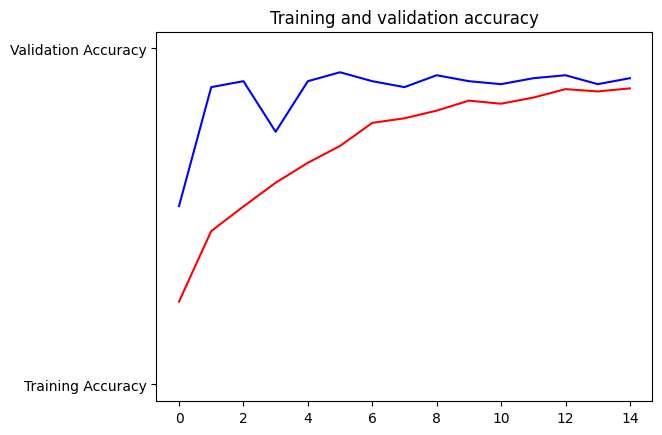

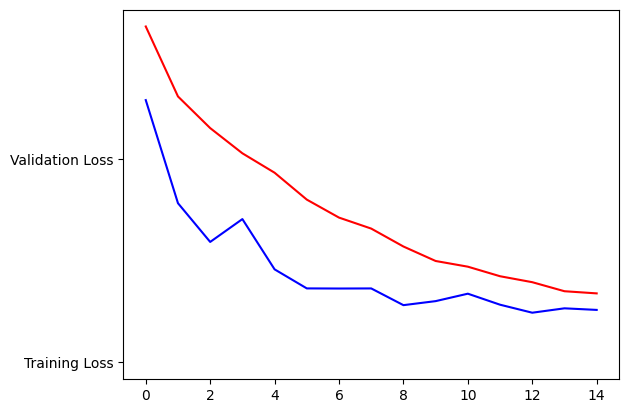

In [ ]:

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc)) 

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()



In [ ]:
#Define saved model path
saved_model_path = "/content/drive/MyDrive/ML/saved_model"
tf.saved_model.save(model, saved_model_path)

#Convert the model
converted_model = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converted_model.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converted_model.convert()

#Save the model
os.makedirs('/content/drive/MyDrive/ML/saved_model/model_tflite')
with open('/content/drive/MyDrive/ML/saved_model/model_tflite/tflite_model.tflite', 'wb') as file:
  file.write(tflite_model)

In [ ]:
path = '/content/dataset_padang_food/ayam_goreng/ayam_goreng (100).jpg'
img = load_img(path, target_size=(150, 150))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
image = np.vstack([x])
model.predict(image)

1/1 [==============================] - 1s 518ms/step


array([[0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)